In [1]:
import pandas as pd
import numpy as np
import pyBigWig as pw


In [46]:

#names = ["chr", "start", "end", "name", "pwm", "strand", "pchr", "pstart", "pend", "tobias", "counts", "profile", "chip", "obs", "label"]
names = ["chr", "start", "end", "name", "pwm", "strand", "pchr", "pstart", "pend", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip", "atac_obs", "dnase_obs"]

cl="HEPG2"
pp="pattern_0_CTCF"
chipenc="ENCSR607XFI"
bed=chipenc+".bed"
#pp="pattern_2_SPI1"
#bed="ENCSR000BGQ.bed"
#pp="pattern_13_POU2F2"
#bed="ENCSR000BGP.bed"

main_dir="/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_5/chip_seq_compare/new_output_jan_18/"
data = pd.read_csv(main_dir+cl+"/"+pp+"/"+bed, sep='\t', names=names)
data["label"] = True
data = data[data["label"]]

In [3]:
data.shape

(46482, 18)

In [4]:
data.head()

,chr,start,end,name,pwm,strand,pchr,pstart,pend,tobias,atac_counts,atac_profile,dnase_counts,dnase_profile,chip,atac_obs,dnase_obs,label
0,chr1,778893,778907,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,8.10064,+,chr1,778468,779291,0.23778,0.035799,0.007140,0.152529,0.028120,0.329369,1065.0,1775.0,True
1,chr1,869920,869934,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,13.50583,+,chr1,869623,870291,0.18210,0.574448,0.248722,0.428719,0.340244,2.595642,538.0,95.0,True
2,chr1,870036,870050,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,8.24970,-,chr1,869623,870291,0.10453,0.044684,0.000060,-0.001219,0.001309,0.127758,483.0,64.0,True
3,chr1,904288,904302,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,7.61974,+,chr1,903727,904505,0.10879,0.001883,-0.000468,-0.013407,-0.001711,0.004132,378.0,20.0,True
4,chr1,904770,904784,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,13.50583,+,chr1,904619,904912,0.44583,0.226025,0.187580,0.274994,0.208691,1.751892,657.0,127.0,True


In [5]:
#observed="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/"+cl+"/DNASE/"+cl+"_wo_bias.bw"
#corrected="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/"+cl+"/ATAC/"+cl+"_wo_bias.bw"
corrected="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/"+cl+"/merge_folds_new/predictions_all_jan_2024_wo_bias.bw"
observed="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/"+cl+"/data/"+cl+"_unstranded.bw"
chip_plus="/oak/stanford/groups/akundaje/vir/tfatlas/processed_data/"+chipenc+"/"+chipenc+"_plus.bigWig"
chip_minus="/oak/stanford/groups/akundaje/vir/tfatlas/processed_data/"+chipenc+"/"+chipenc+"_minus.bigWig"

bw_obs = pw.open(observed)
bw_corr = pw.open(corrected)
bw_cp = pw.open(chip_plus)
bw_cm = pw.open(chip_minus)




In [6]:
observed_vals_chip = []
for i,r in data.iterrows():
    mid = int((r["start"]+r["end"])/2)
    val1 = np.nan_to_num(bw_cp.values(r['chr'],mid-150,mid+150))
    val2 = np.nan_to_num(bw_cm.values(r['chr'],mid-150,mid+150))
    
    if r["strand"]=="-":
        observed_vals_chip.append([val2[::-1]/np.sum(val2), val1[::-1]/np.sum(val1)])
    else:
        observed_vals_chip.append([val1/np.sum(val1), val2/np.sum(val2)])
observed_vals_chip = np.array(observed_vals_chip)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [7]:
print(observed_vals_chip.shape)

(46482, 2, 300)


In [8]:
observed_vals = []
for i,r in data.iterrows():
    mid = int((r["start"]+r["end"])/2)
    val1 = np.nan_to_num(bw_obs.values(r['chr'],mid-60,mid+60))
    if r["strand"]=="-":
        observed_vals.append(val1[::-1]/np.sum(val1))
    else:
        observed_vals.append(val1/np.sum(val1))
observed_vals = np.array(observed_vals)

In [9]:
corrected_vals = []
for i,r in data.iterrows():
    mid = int((r["start"]+r["end"])/2)
    val1 = np.nan_to_num(bw_corr.values(r['chr'],mid-60,mid+60))
    if r["strand"]=="-":
        corrected_vals.append(val1[::-1]/np.sum(val1))
    else:
        corrected_vals.append(val1/np.sum(val1))
corrected_vals = np.array(corrected_vals)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [10]:
index_nan = np.isnan(corrected_vals).any(axis=1) | np.isnan(observed_vals).any(axis=1) | np.isnan(np.squeeze(observed_vals_chip[:,0,:])).any(axis=1) | np.isnan(np.squeeze(observed_vals_chip[:,1,:])).any(axis=1)




In [11]:
sum(index_nan)

135

In [12]:
wn=2000

# names =  ["atac_obs", "dnase_obs", "tobias",  "atac_profile", "dnase_profile", "chip"]
# labels = ["ATAC \n raw \n counts", "DNase \n raw \n counts", "ATAC tobias","ATAC \n  profile \n contrib",  "DNASE \n profile \n contrib", "Chip contrib"]
colrs = ["#5FB4EF", "orange", "#ABABAB", "#3D963D", "#9B4CAF", "red"]

names =  ["chip", "atac_counts", "dnase_counts", "atac_obs", "dnase_obs", "tobias" ]
labels = [ "Chip contrib", "ATAC counts contrib",  "DNASE counts contrib",  "ATAC raw counts", "DNase raw counts", "ATAC tobias"]

ndds = [] 
avg_obs = []
for i in range(len(names)): 
    temp=data[names[i]].values[~index_nan]
    index=np.argsort(abs(temp))[::-1][:temp.shape[0]]
    ndd = observed_vals[~index_nan]
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(abs(ndd[index]),wn,axis=0)[0::wn],axis=-1)
    ndds.append(ndd0)
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(temp[index],wn)[0::wn],axis=-1)
    avg_obs.append(ndd0)

ndds_corr = []
for i in range(len(names)): 
    temp=data[names[i]].values[~index_nan]
    index=np.argsort(abs(temp))[::-1][:temp.shape[0]]
    ndd = corrected_vals[~index_nan]
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(ndd[index],wn,axis=0)[0::wn],axis=-1)
    ndds_corr.append(ndd0)
    
    
observed_vals_chip1 = observed_vals_chip[~index_nan]

ndds_chip_p = []
ndds_chip_m = []
for i in range(len(names)): 
    temp=data[names[i]].values[~index_nan]
    index=np.argsort(abs(temp))[::-1][:temp.shape[0]]
    ndd = observed_vals_chip1[index]
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,0,:]),wn,axis=0)[0::wn],axis=-1)
    ndds_chip_p.append(np.squeeze(ndd0))
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,1,:]),wn,axis=0)[0::wn],axis=-1)
    ndds_chip_m.append(np.squeeze(ndd0))

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and su

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and su

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and su

0.035876267077723914


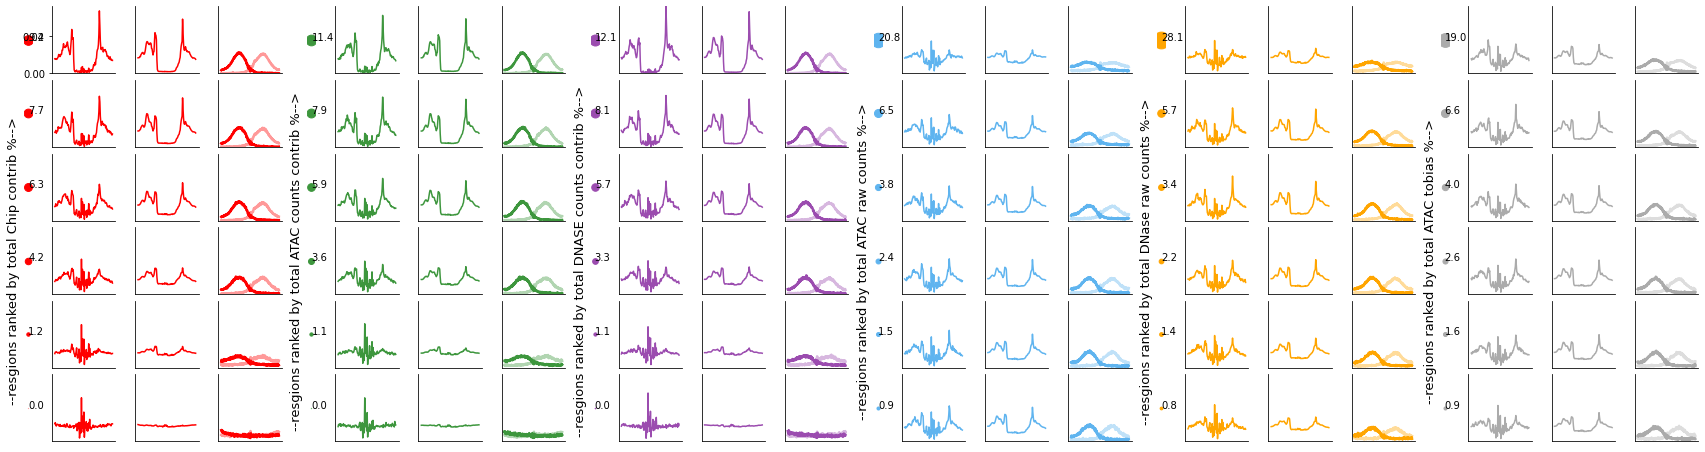

In [13]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as clr
import matplotlib.gridspec as gridspec

# names =  ["atac_obs", "dnase_obs", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip"]
# labels = ["ATAC \n raw \n counts", "DNase \n raw \n counts", "ATAC tobias", "ATAC \n counts \n contrib","ATAC \n  profile \n contrib",  "DNASE \n counts \n contrib", "DNASE \n profile \n contrib", "Chip contrib"]

#names =  ["atac_obs", "dnase_obs", "tobias",  "atac_profile", "dnase_profile", "chip"]
#labels = ["ATAC raw counts", "DNase raw counts", "ATAC tobias","ATAC profile contrib",  "DNASE profile contrib", "Chip contrib"]

names =  ["chip", "atac_counts", "dnase_counts", "atac_obs", "dnase_obs", "tobias" ]
labels = [ "Chip contrib", "ATAC counts contrib",  "DNASE counts contrib",  "ATAC raw counts", "DNase raw counts", "ATAC tobias"]

#no_signals=len(cwm_values)

observed_vals1 = observed_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin, vmax = np.percentile(observed_vals1, [5, 95])

corrected_vals1 = corrected_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin1, vmax1 = np.percentile(corrected_vals1, [5, 95])

colrs = ["red", "#3D963D", "#9B4CAF", "#5FB4EF", "orange", "#ABABAB" ]


fig = plt.figure(figsize=(30, 8))
outer = gridspec.GridSpec(6, len(names), wspace=0.1, hspace=0.1)

avg_obs_n = np.array(avg_obs)
for i in range(len(names)):
    for j in range(len(avg_obs[0])):
        avg_obs_n[i][j] = abs(avg_obs[i][j])/sum(abs(avg_obs[i][:]))

for i in range(len(names)):
    for j in range(6):
        inner = gridspec.GridSpecFromSubplotSpec(1, 4,
                        subplot_spec=outer[len(names)*j+i], width_ratios=[0.04,0.32,0.32,0.32], wspace=0.4, hspace=0.1)

        
        #print(names[i],j)
        #print(i)
        k=0
        ax = plt.Subplot(fig, inner[k])
        #print(avg_obs[i][4*j])
        #print(avg_obs_n[i][4*j])
        ax.scatter(x=['x'], y=['y'], c=colrs[i], s=[abs(avg_obs_n[i][4*j])*1000])
        ax.annotate(str(np.round(avg_obs_n[i][4*j]*100,1)), ('x', 'y'))
        ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
        ax.margins(.4)
        ax.set_xticks([])
        ax.set_yticks([])
        if j==3:
            ax.set_ylabel("--resgions ranked by total "+labels[i]+" %-->")
            ax.yaxis.label.set_size(13)
        fig.add_subplot(ax)

        
        k=1
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds[i][4*j], color=colrs[i])
        ax.spines[['right', 'top']].set_visible(False)
        #ax.set_xlim([0, 100])
        ax.set_ylim([0, np.max(ndds)])
#         if j==0:
#             ax.set_title(labels[i],loc='left')
        ax.set_xticks([])
        if i==0 and j==0:
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)

        k=2
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds_corr[i][4*j], color=colrs[i])
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_ylim([0, np.max(ndds)])
        ax.set_xticks([])
        #ax.set_yticks([])
        if i==0 and j==0:
            #ax.set_title(labels[i],loc='left')
            ax.set_yticks([]) 
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)
        
        k=3
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds_chip_p[i][4*j], '-', markevery=(0,8), ms=5, rasterized=True, color=colrs[i], linewidth=2.5)
        ax.plot(ndds_chip_m[i][4*j], '-', markevery=(0,8), ms=5, color=colrs[i],  linewidth=2.5, alpha=0.4)
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_ylim([0, np.max(ndds)])
        ax.set_xticks([])
        #ax.set_yticks([])
        if i==0 and j==0:
            #ax.set_title(labels[i],loc='left')
            ax.set_yticks([]) 
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)
        
#fig.show()

print(np.max(ndds))


plt.savefig("ctcf_hepg_occupancy_plot_2.pdf", dpi=300, transparent=True)


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and su

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.


0.03517697709796598


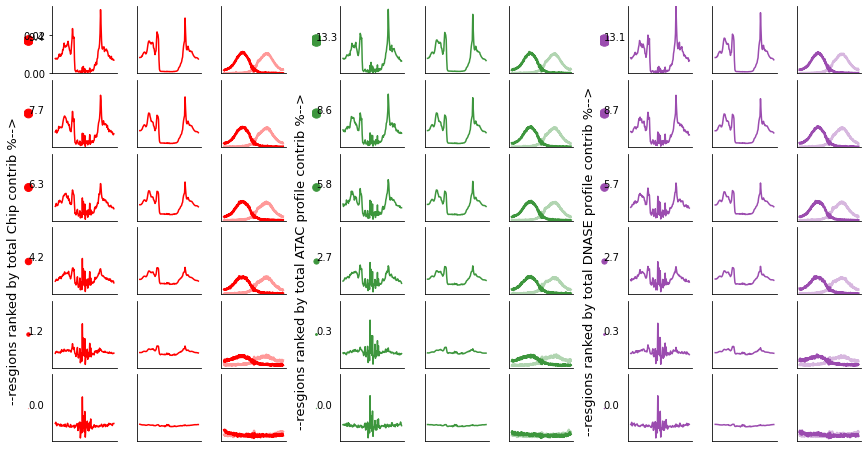

In [14]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as clr
import matplotlib.gridspec as gridspec

# names =  ["atac_obs", "dnase_obs", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip"]
# labels = ["ATAC \n raw \n counts", "DNase \n raw \n counts", "ATAC tobias", "ATAC \n counts \n contrib","ATAC \n  profile \n contrib",  "DNASE \n counts \n contrib", "DNASE \n profile \n contrib", "Chip contrib"]

names =  ["chip", "atac_profile", "dnase_profile"]
labels = ["Chip contrib", "ATAC profile contrib",  "DNASE profile contrib"]

colrs = ["red", "#3D963D", "#9B4CAF"]

ndds = [] 
avg_obs = []
for i in range(len(names)): 
    temp=data[names[i]].values[~index_nan]
    index=np.argsort(abs(temp))[::-1][:temp.shape[0]]
    ndd = observed_vals[~index_nan]
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(abs(ndd[index]),wn,axis=0)[0::wn],axis=-1)
    ndds.append(ndd0)
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(temp[index],wn)[0::wn],axis=-1)
    avg_obs.append(ndd0)

ndds_corr = []
for i in range(len(names)): 
    temp=data[names[i]].values[~index_nan]
    index=np.argsort(abs(temp))[::-1][:temp.shape[0]]
    ndd = corrected_vals[~index_nan]
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(ndd[index],wn,axis=0)[0::wn],axis=-1)
    ndds_corr.append(ndd0)
    
    
observed_vals_chip1 = observed_vals_chip[~index_nan]

ndds_chip_p = []
ndds_chip_m = []
for i in range(len(names)): 
    temp=data[names[i]].values[~index_nan]
    index=np.argsort(abs(temp))[::-1][:temp.shape[0]]
    ndd = observed_vals_chip1[index]
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,0,:]),wn,axis=0)[0::wn],axis=-1)
    ndds_chip_p.append(np.squeeze(ndd0))
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,1,:]),wn,axis=0)[0::wn],axis=-1)
    ndds_chip_m.append(np.squeeze(ndd0))
    
fig = plt.figure(figsize=(15, 8))
outer = gridspec.GridSpec(6, len(names), wspace=0.1, hspace=0.1)

avg_obs_n = np.array(avg_obs)
for i in range(len(names)):
    for j in range(len(avg_obs[0])):
        avg_obs_n[i][j] = abs(avg_obs[i][j])/sum(abs(avg_obs[i][:]))

for i in range(len(names)):
    for j in range(6):
        inner = gridspec.GridSpecFromSubplotSpec(1, 4,
                        subplot_spec=outer[len(names)*j+i], width_ratios=[0.04,0.32,0.32,0.32], wspace=0.4, hspace=0.1)

        
        #print(names[i],j)
        #print(i)
        k=0
        ax = plt.Subplot(fig, inner[k])
        #print(avg_obs[i][4*j])
        #print(avg_obs_n[i][4*j])
        ax.scatter(x=['x'], y=['y'], c=colrs[i], s=[abs(avg_obs_n[i][4*j])*1000])
        ax.annotate(str(np.round(avg_obs_n[i][4*j]*100,1)), ('x', 'y'))
        ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
        ax.margins(.4)
        ax.set_xticks([])
        ax.set_yticks([])
        if j==3:
            ax.set_ylabel("--resgions ranked by total "+labels[i]+" %-->")
            ax.yaxis.label.set_size(13)
        fig.add_subplot(ax)

        
        k=1
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds[i][4*j], color=colrs[i])
        ax.spines[['right', 'top']].set_visible(False)
        #ax.set_xlim([0, 100])
        ax.set_ylim([0, np.max(ndds)])
#         if j==0:
#             ax.set_title(labels[i],loc='left')
        ax.set_xticks([])
        if i==0 and j==0:
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)

        k=2
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds_corr[i][4*j], color=colrs[i])
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_ylim([0, np.max(ndds)])
        ax.set_xticks([])
        #ax.set_yticks([])
        if i==0 and j==0:
            #ax.set_title(labels[i],loc='left')
            ax.set_yticks([]) 
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)
        
        k=3
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds_chip_p[i][4*j], '-', markevery=(0,8), ms=5, rasterized=True, color=colrs[i], linewidth=2.5)
        ax.plot(ndds_chip_m[i][4*j], '-', markevery=(0,8), ms=5, color=colrs[i],  linewidth=2.5, alpha=0.4)
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_ylim([0, np.max(ndds)])
        ax.set_xticks([])
        #ax.set_yticks([])
        if i==0 and j==0:
            #ax.set_title(labels[i],loc='left')
            ax.set_yticks([]) 
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)
        
#fig.show()

print(np.max(ndds))

plt.savefig("ctcf_hepg_occupancy_plot_counts_2.pdf", dpi=300, transparent=True)



/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 an

0.035876267077723914


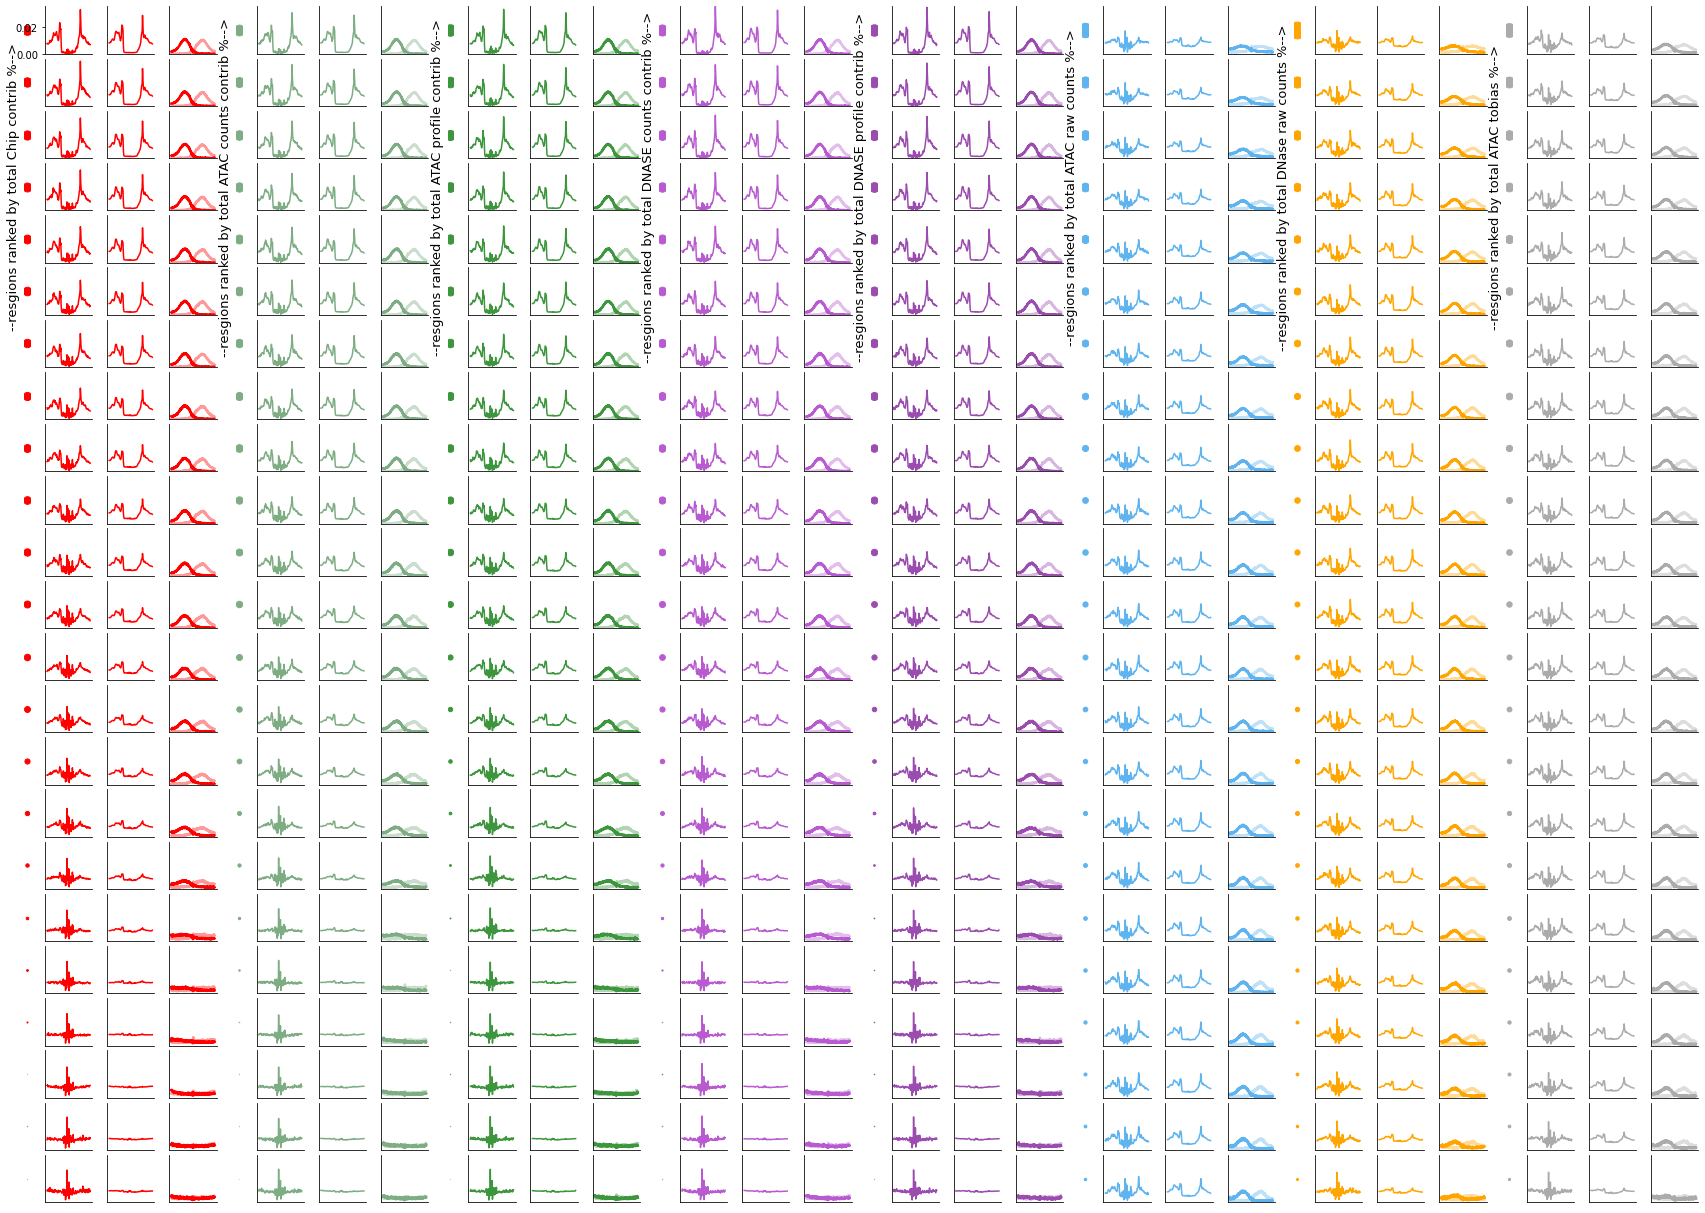

In [15]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as clr
import matplotlib.gridspec as gridspec

# names =  ["atac_obs", "dnase_obs", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip"]
# labels = ["ATAC \n raw \n counts", "DNase \n raw \n counts", "ATAC tobias", "ATAC \n counts \n contrib","ATAC \n  profile \n contrib",  "DNASE \n counts \n contrib", "DNASE \n profile \n contrib", "Chip contrib"]

names =  ["atac_obs", "dnase_obs", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip"]
labels = ["ATAC raw counts", "DNase raw counts", "ATAC tobias", "ATAC counts contrib","ATAC profile contrib",  "DNASE counts contrib", "DNASE profile contrib", "Chip contrib"]

names =  ["chip", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "atac_obs", "dnase_obs", "tobias" ]
labels = [ "Chip contrib", "ATAC counts contrib", "ATAC profile contrib",  "DNASE counts contrib",  "DNASE profile contrib", "ATAC raw counts", "DNase raw counts", "ATAC tobias"]
#colrs = ["red", "#3D963D", "#9B4CAF", "#5FB4EF", "orange", "#ABABAB" ]

colrs = ["red", "#7EAD84", "#3D963D", "#B95BD0", "#9B4CAF", "#5FB4EF", "orange", "#ABABAB", ]

wn=2000


ndds = [] 
avg_obs = []
for i in range(len(names)): 
    temp=data[names[i]].values[~index_nan]
    index=np.argsort(abs(temp))[::-1][:temp.shape[0]]
    ndd = observed_vals[~index_nan]
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(abs(ndd[index]),wn,axis=0)[0::wn],axis=-1)
    ndds.append(ndd0)
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(temp[index],wn)[0::wn],axis=-1)
    avg_obs.append(ndd0)

ndds_corr = []
for i in range(len(names)): 
    temp=data[names[i]].values[~index_nan]
    index=np.argsort(abs(temp))[::-1][:temp.shape[0]]
    ndd = corrected_vals[~index_nan]
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(ndd[index],wn,axis=0)[0::wn],axis=-1)
    ndds_corr.append(ndd0)
    
    
observed_vals_chip1 = observed_vals_chip[~index_nan]

ndds_chip_p = []
ndds_chip_m = []
for i in range(len(names)): 
    temp=data[names[i]].values[~index_nan]
    index=np.argsort(abs(temp))[::-1][:temp.shape[0]]
    ndd = observed_vals_chip1[index]
    
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,0,:]),wn,axis=0)[0::wn],axis=-1)
    ndds_chip_p.append(np.squeeze(ndd0))
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,1,:]),wn,axis=0)[0::wn],axis=-1)
    ndds_chip_m.append(np.squeeze(ndd0))
    
#no_signals=len(cwm_values)

observed_vals1 = observed_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin, vmax = np.percentile(observed_vals1, [5, 95])

corrected_vals1 = corrected_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin1, vmax1 = np.percentile(corrected_vals1, [5, 95])


avg_obs_n = np.array(avg_obs)
for i in range(len(names)):
    for j in range(len(avg_obs[0])):
        avg_obs_n[i][j] = abs(avg_obs[i][j])/sum(abs(avg_obs[i][:]))

        
fig = plt.figure(figsize=(30, 22))
outer = gridspec.GridSpec(ndds[0].shape[0], len(names), wspace=0.1, hspace=0.1)

avg_obs_n = np.array(avg_obs)
for i in range(len(names)):
    for j in range(len(avg_obs[0])):
        avg_obs_n[i][j] = abs(avg_obs[i][j])/sum(abs(avg_obs[i][:]))

for i in range(len(names)):
    for j in range(ndds[0].shape[0]):
        inner = gridspec.GridSpecFromSubplotSpec(1, 4,
                        subplot_spec=outer[len(names)*j+i], width_ratios=[0.04,0.32,0.32,0.32], wspace=0.4, hspace=0.1)

        
        
        #print(names[i],j)
        #print(i)
        k=0
        ax = plt.Subplot(fig, inner[k])
        #print(avg_obs[i][4*j])
        #print(avg_obs_n[i][4*j])
        ax.scatter(x=['x'], y=['y'], c=colrs[i], s=[abs(avg_obs_n[i][j])*1000])
        #ax.annotate(str(np.round(avg_obs_n[i][4*j]*100,1)), ('x', 'y'))
        ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
        ax.margins(.4)
        ax.set_xticks([])
        ax.set_yticks([])
        if j==3:
            ax.set_ylabel("--resgions ranked by total "+labels[i]+" %-->")
            ax.yaxis.label.set_size(13)
        fig.add_subplot(ax)

        
        k=1
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds[i][j], color=colrs[i])
        ax.spines[['right', 'top']].set_visible(False)
        #ax.set_xlim([0, 100])
        ax.set_ylim([0, np.max(ndds)])
#         if j==0:
#             ax.set_title(labels[i],loc='left')
        ax.set_xticks([])
        if i==0 and j==0:
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)

        k=2
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds_corr[i][j], color=colrs[i])
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_ylim([0, np.max(ndds)])
        ax.set_xticks([])
        #ax.set_yticks([])
        if i==0 and j==0:
            #ax.set_title(labels[i],loc='left')
            ax.set_yticks([]) 
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)
        
        k=3
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds_chip_p[i][j], '-', markevery=(0,8), ms=5, rasterized=True, color=colrs[i], linewidth=2.5)
        ax.plot(ndds_chip_m[i][j], '-', markevery=(0,8), ms=5, color=colrs[i], rasterized=True,  linewidth=2.5, alpha=0.4)
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_ylim([0, np.max(ndds)])
        ax.set_xticks([])
        #ax.set_yticks([])
        if i==0 and j==0:
            #ax.set_title(labels[i],loc='left')
            ax.set_yticks([]) 
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)
        
#fig.show()

print(np.max(ndds))


plt.savefig("ctcf_hepg_occupancy_plot_1.pdf", dpi=300, transparent=True)


0
2
4
6
8
10
12
14
16
18
20
22
24
26
28


<Figure size 432x288 with 0 Axes>

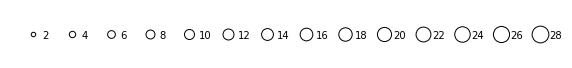

In [16]:
plt.figure()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 1))
for j in range(0,30,2):
    print(j)
    ax.scatter(j,0,s=j*10, c="white", edgecolors='black')
    ax.annotate(str(j), (j+0.5,0-0.01))

    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig("legend.pdf", dpi=300, transparent=True)


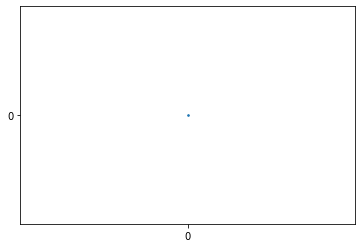

In [17]:
i=0
j=0
plt.scatter(x=str(0), y=str(0), s=avg_obs[i][4*j])

In [19]:
ndds[0].shape[0]

23

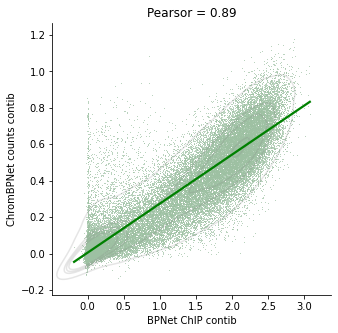

In [102]:
import scipy.stats
# fig, ax = plt.subplots(figsize=(5,5))
# ax.scatter(, , alpha=0.1, rasterized=True, color="green")
# ax.set_ylabel("ChromBPNet counts contib")
# ax.set_xlabel("BPNet ChIP contib")
# ax.set_title("Pearsor = "+str(np.round(scipy.stats.pearsonr(data["atac_counts"], data["chip"])[0],2)))
# ax.spines[["top", "right"]].set_visible(False)

import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
from scipy.interpolate import interpn


datan = pd.DataFrame()
datan["y"] = data["atac_counts"]
datan["x"] = data["chip"]
x=datan["x"]
y=datan["y"]
datar , x_e, y_e = np.histogram2d(datan["x"], datan["y"], bins = 20, density = True )
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , datar , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)
datan["z"] = z

# plt.figure(figsize=(8,5))
fig, ax = plt.subplots(figsize=(5,5))

sns.kdeplot(
    data=datan,
    x="x",
    y="y",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,
)

sns.scatterplot(x="x", y="y", data=datan, s=1, alpha=0.8, rasterized=True, color="#7EAD84")
sns.regplot(x="x", y="y", data=datan, scatter=False, ci=None, color="green")
#sm.set_array([])
ax.set_ylabel("ChromBPNet counts contib")
ax.set_xlabel("BPNet ChIP contib")
ax.set_title("Pearsor = "+str(np.round(scipy.stats.pearsonr(data["atac_counts"], data["chip"])[0],2)))
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("correlation_plot_hep_ctcf.pdf", dpi=300, transparent=True)

# Remove the legend and add a colorbar
#ax.get_legend().remove()
#ax.figure.colorbar(sm)



In [85]:
pearsonrs = []
names =  ["atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "atac_obs", "dnase_obs", "tobias" ]
labels = [ "ATAC counts contrib", "ATAC profile contrib",  "DNASE counts contrib",  "DNASE profile contrib", "ATAC raw counts", "DNase raw counts", "ATAC tobias"]
#colrs = ["red", "#3D963D", "#9B4CAF", "#5FB4EF", "orange", "#ABABAB" ]

colrs = ["#7EAD84", "#3D963D", "#B95BD0", "#9B4CAF", "#5FB4EF", "orange", "#ABABAB", ]

for name in names:
    if "obs" in name:
        val = np.log(data[name]+1)
        print(name)
    else:
        val = data[name]
    pearsonrs.append(np.round(scipy.stats.pearsonr(val, data["chip"])[0],3))
    print(pearsonrs[-1])

0.893
0.879
0.886
0.866
atac_obs
-0.181
dnase_obs
0.166
0.003


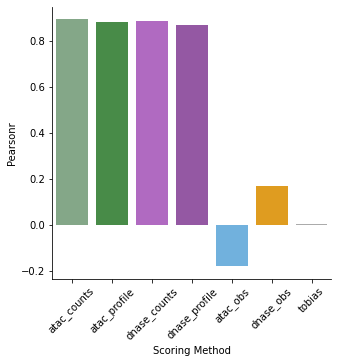

In [96]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=names, y=pearsonrs, palette=colrs)
ax.set_ylabel("Pearsonr")
ax.set_xlabel("Scoring Method")
ax.spines[["top", "right"]].set_visible(False)
y_pos = range(len(names))

ax.set_xticks(y_pos, names, rotation=45)
plt.savefig("pearonrs_all_hep_ctcf.pdf", dpi=300, transparent=True)
